## Data loading

Sources: 
- https://physionet.org/content/ptb-xl/1.0.3/


The code comes with a script to load the data, I have taken inspiration from most of it https://physionet.org/content/ptb-xl/1.0.3/example_physionet.py

### Importing the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, Input, BatchNormalization,concatenate, GlobalAveragePooling1D



In [3]:
from data_loading_utils import load_data_from_directory

X, Y, df = load_data_from_directory("data/", sampling_rate=100)

### Data Exploration

In [4]:
df.head(20)

,description,diagnostic,form,rhythm,diagnostic_class,diagnostic_subclass,Statement Category,SCP-ECG Statement Description,AHA code,aECG REFID,CDISC Code,DICOM Code
NDT,non-diagnostic T abnormalities,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,non-diagnostic T abnormalities,NaN,NaN,NaN,NaN
NST_,non-specific ST changes,1.0,1.0,NaN,STTC,NST_,Basic roots for coding ST-T changes and abnorm...,non-specific ST changes,145.0,MDC_ECG_RHY_STHILOST,NaN,NaN
DIG,digitalis-effect,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,suggests digitalis-effect,205.0,NaN,NaN,NaN
LNGQT,long QT-interval,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,long QT-interval,148.0,NaN,NaN,NaN
NORM,normal ECG,1.0,NaN,NaN,NORM,NORM,Normal/abnormal,normal ECG,1.0,NaN,NaN,F-000B7
IMI,inferior myocardial infarction,1.0,NaN,NaN,MI,IMI,Myocardial Infarction,inferior myocardial infarction,161.0,NaN,NaN,NaN
ASMI,anteroseptal myocardial infarction,1.0,NaN,NaN,MI,AMI,Myocardial Infarction,anteroseptal myocardial infarction,165.0,NaN,NaN,NaN
LVH,left ventricular hypertrophy,1.0,NaN,NaN,HYP,LVH,Ventricular Hypertrophy,left ventricular hypertrophy,142.0,NaN,C71076,NaN
LAFB,left anterior fascicular block,1.0,NaN,NaN,CD,LAFB/LPFB,Intraventricular and intra-atrial Conduction d...,left anterior fascicular block,101.0,MDC_ECG_BEAT_BLK_ANT_L_HEMI,C62267,D3-33140
ISC_,non-specific ischemic,1.0,NaN,NaN,STTC,ISC_,Basic roots for coding ST-T changes and abnorm...,ischemic ST-T changes,226.0,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44 entries, NDT to 2AVB
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   description                    44 non-null     object 
 1   diagnostic                     44 non-null     float64
 2   form                           4 non-null      float64
 3   rhythm                         0 non-null      float64
 4   diagnostic_class               44 non-null     object 
 5   diagnostic_subclass            44 non-null     object 
 6   Statement Category             44 non-null     object 
 7   SCP-ECG Statement Description  44 non-null     object 
 8   AHA code                       22 non-null     float64
 9   aECG REFID                     12 non-null     object 
 10  CDISC Code                     13 non-null     object 
 11  DICOM Code                     9 non-null      object 
dtypes: float64(4), object(8)
memory usage: 5.5+ KB


### Exploration of the Labels

In [6]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21799 entries, 1 to 21837
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   patient_id                    21799 non-null  float64
 1   age                           21799 non-null  float64
 2   sex                           21799 non-null  int64  
 3   height                        6974 non-null   float64
 4   weight                        9421 non-null   float64
 5   nurse                         20326 non-null  float64
 6   site                          21782 non-null  float64
 7   device                        21799 non-null  object 
 8   recording_date                21799 non-null  object 
 9   report                        21799 non-null  object 
 10  scp_codes                     21799 non-null  object 
 11  heart_axis                    13331 non-null  object 
 12  infarction_stadium1           5612 non-null   object 
 13  infarc

In [7]:
Y.head()

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,diagnostic_superclass
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,...,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr,[NORM]
2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,...,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr,[NORM]
3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,...,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr,[NORM]
4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,sinusrhythmus normales ekg,...,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr,[NORM]
5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,sinusrhythmus normales ekg,...,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr,[NORM]


In [8]:
# Check the shape of the data and labels distributions
Y['diagnostic_superclass'].value_counts()

diagnostic_superclass
[NORM]                 9069
[MI]                   2532
[STTC]                 2400
[CD]                   1708
[MI, CD]               1297
[HYP, STTC]             608
[STTC, MI]              599
[HYP]                   535
[STTC, CD]              471
[]                      411
[NORM, CD]              407
[HYP, MI, STTC]         340
[HYP, CD]               300
[STTC, MI, CD]          223
[HYP, MI]               183
[STTC, HYP]             173
[HYP, STTC, CD]         156
[HYP, MI, STTC, CD]     141
[HYP, MI, CD]           117
[STTC, HYP, CD]          55
[STTC, NORM]             28
[STTC, MI, HYP]          21
[STTC, MI, HYP, CD]      15
[STTC, NORM, CD]          5
[HYP, NORM, CD]           2
[HYP, NORM]               2
[HYP, NORM, MI, CD]       1
Name: count, dtype: int64

In [9]:
# check the missing values in the labels 'diagnostic_superclass'
Y['diagnostic_superclass'].isnull().sum()

0

#### Main points
- The dataset consists of 21837 ECG recordings, each with 12 leads.
- The ECGs are sampled at 100 Hz, with a duration of 10 seconds.
- The dataset includes 5 diagnostic superclass categories.
- the dataset is imbalanced, with some classes having a large number of samples, while others have very few.
- there are 411 missing values in the diagnostic superclass categories, which are represented as NaNs.


### Cardiac Diagnoses

#### NORM (Normal ECG)
- **Description**: This diagnosis indicates a normal electrocardiogram (ECG), meaning there are no significant abnormalities in the heart's electrical activity. The heart rhythm and waveforms fall within the typical range for a healthy individual.

#### MI (Myocardial Infarction)
- **Description**: Myocardial Infarction, commonly known as a heart attack, is characterized by the interruption of blood flow to a part of the heart, causing damage to the heart muscle. On an ECG, it may present as ST elevation, T wave inversion, or the development of Q waves, among other changes.

#### STTC (ST/T Change)
- **Description**: ST/T changes refer to abnormalities in the ST segment and T wave of the ECG. These changes can indicate various conditions, such as ischemia (reduced blood flow to the heart), electrolyte imbalances, or other cardiac pathologies. The specific nature of the change provides clues about the underlying condition.

#### CD (Conduction Disturbance)
- **Description**: Conduction disturbances involve abnormalities in the electrical conduction system of the heart, which can affect the timing and coordination of heartbeats. Examples include bundle branch blocks, atrioventricular (AV) blocks, and other forms of heart block. These are reflected on the ECG as altered intervals and waveforms.

#### HYP (Hypertrophy)
- **Description**: Hypertrophy refers to the thickening of the heart muscle, typically the result of increased workload or pressure. It is commonly seen in conditions such as hypertension or valvular heart disease. On an ECG, hypertrophy may present as increased voltage of QRS complexes, prolonged QRS duration, and changes in the ST segment and T waves.

This structured format categorizes the diagnoses based on their unique identifier, abbreviation, and a detailed description of each condition.

#### According to the dataset documentation - there are 410 samples for which no diagnostic statement is given, which are mainly pacemaker ECGs. These samples are not included in the diagnostic superclass categories. So for the purpose of this project, first we will explore the pacemaker column to understand the distribution of these samples.

In [10]:
Y['pacemaker'].isnull().sum()

21508

In [11]:
Y['pacemaker'].value_counts()

pacemaker
ja, pacemaker    285
ja, nan            3
PACE????, nan      2
?, nan             1
Name: count, dtype: int64

In [12]:
# check the missing values in the labels 'diagnostic_superclass' and respective 'pacemaker' values
Y[Y['diagnostic_superclass'].apply(lambda x: len(x)) == 0]['pacemaker'].value_counts()

pacemaker
ja, pacemaker    277
Name: count, dtype: int64

#### So concideering the above inverstigation only 277 out of 411 missing values in the diagnostic superclass categories are confirmed to be pacemaker ECGs. Other 134 samples of NAN  diagnostic_superclass has no pacemaker information. 

In [13]:
# Lets check the distribution of the missinh values in the diagnostic superclass througout the folds
Y[Y['diagnostic_superclass'].apply(lambda x: len(x)) == 0]['strat_fold'].value_counts()

strat_fold
8     44
6     44
4     44
2     43
7     42
3     42
10    40
5     39
9     37
1     36
Name: count, dtype: int64

#### The missing values in the diagnostic superclass are equally distributed across all folds, so we can simply remove all the missing values without worrying about the fold distribution.

### Final conclusion: We will remove the samples with missing values (411) in the diagnostic superclass categories from the dataset.

### Feature Engineering

#### Create a new column for the superclass aggregation if 'diagnostic_superclass' has MI in list it will be MI, all other classes will be 'NORMAL' to simplify the classification problem.

In [14]:
# create new column for the superclass aggregation if 'diagnostic_superclass' has MI in list it will be MI, all other classes will be 'NORMAL' 
Y['diagnostic_binary'] = Y['diagnostic_superclass'].apply(lambda x: 'MI' if 'MI' in x else 'NORMAL')
    

In [15]:
Y['diagnostic_binary'].value_counts()

diagnostic_binary
NORMAL    16330
MI         5469
Name: count, dtype: int64

In [16]:
# Check the hiden missing values in the labels 'diagnostic_superclass' which are represented as an empty list
Y['diagnostic_superclass'].apply(lambda x: len(x)).value_counts()

diagnostic_superclass
1    16244
2     4068
3      919
0      411
4      157
Name: count, dtype: int64

In [17]:
# drop the rows with missing values in the labels 'diagnostic_superclass'
Y_clean = Y[Y['diagnostic_superclass'].apply(lambda x: len(x)) > 0]

In [18]:
# Check the shape of the data and labels distributions
Y_clean['diagnostic_superclass'].apply(lambda x: len(x)).value_counts()

diagnostic_superclass
1    16244
2     4068
3      919
4      157
Name: count, dtype: int64

In [19]:
Y_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21388 entries, 1 to 21837
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   patient_id                    21388 non-null  float64
 1   age                           21388 non-null  float64
 2   sex                           21388 non-null  int64  
 3   height                        6918 non-null   float64
 4   weight                        9366 non-null   float64
 5   nurse                         19949 non-null  float64
 6   site                          21372 non-null  float64
 7   device                        21388 non-null  object 
 8   recording_date                21388 non-null  object 
 9   report                        21388 non-null  object 
 10  scp_codes                     21388 non-null  object 
 11  heart_axis                    13228 non-null  object 
 12  infarction_stadium1           5600 non-null   object 
 13  infarc

In [20]:
# drop columns that are not needed
Y_clean = Y_clean.drop(['diagnostic_superclass'], axis=1)

### Data Splitting

In [21]:
def get_train_test_split(X, Y, test_fold=10, validation=False):
    """
    Splits the data into training, test, and optionally validation sets based on the stratification fold.
    but for simplisity we will use diagnostic_binary as the target variable.
    """
    validation_folds = [8, 9]
    # From the documentation of the dataset, they recommend for the test fold to be 10 and 8 and 9 as validation.

    X_train = X[np.where((Y.strat_fold != test_fold) & (~Y.strat_fold.isin(validation_folds)))]
    y_train = Y[(Y.strat_fold != test_fold) & (~Y.strat_fold.isin(validation_folds))].diagnostic_binary

    X_test = X[np.where(Y.strat_fold == test_fold)]
    y_test = Y[Y.strat_fold == test_fold].diagnostic_binary

    if validation:
        X_val = X[np.where(Y.strat_fold.isin(validation_folds))]
        y_val = Y[Y.strat_fold.isin(validation_folds)].diagnostic_binary

        return X_train, X_test, y_train, y_test, X_val, y_val
    else:
        return X_train, X_test, y_train, y_test

In [22]:
# If you also want to get validation splits
X_train, X_test, y_train, y_test, X_val, y_val = get_train_test_split(X, Y_clean, test_fold=10, validation=True)

# Print shapes of the datasets including validation
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)


X_train shape: (14955, 1000, 12)
X_test shape: (2158, 1000, 12)
y_train shape: (14955,)
y_test shape: (2158,)
X_val shape: (4275, 1000, 12)
y_val shape: (4275,)


In [23]:
y_test.value_counts()

diagnostic_binary
NORMAL    1608
MI         550
Name: count, dtype: int64

In [24]:
X_train[0].shape

(1000, 12)

In [25]:
# Reshape the labels to be compatible with the neural network
y_train_oh = pd.get_dummies(y_train)
y_val_oh = pd.get_dummies(y_val)
y_test_oh = pd.get_dummies(y_test)

In [54]:
# save the train, test, and validation sets to the folder data for future use
np.save('data/X_train.npy', X_train)
np.save('data/X_test.npy', X_test)
np.save('data/y_train.npy', y_train)
# and y as pandas DataFrame
y_train.to_csv('data/y_train.csv', index=False)
y_val.to_csv('data/y_val.csv', index=False)
y_test.to_csv('data/y_test.csv', index=False)

### Simple Neural Network

In [26]:
# get the input shape and number of classes
input_shape = X_train.shape[1:]
num_classes = y_train_oh.shape[1]
input_shape, num_classes

((1000, 12), 2)

In [27]:
# Define a simple neural network
snn = Sequential()
snn.add(Flatten(input_shape=input_shape))
snn.add(Dense(128, activation='relu'))
snn.add(Dense(256, activation='relu'))
snn.add(Dropout(0.2))
snn.add(Dense(64, activation='relu'))
snn.add(Dropout(0.2))
snn.add(Dense(32, activation='relu'))
snn.add(Dense(num_classes, activation='sigmoid')) 
snn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
snn.summary()

/Users/gala/PycharmProjects/Saturdays_FP/disease-prediction/dis/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 12000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,536,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,587,746 (6.06 MB)

 Trainable params: 1,587,746 (6.06 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# Train the model
history = snn.fit(X_train, y_train_oh, validation_data=(X_val, y_val_oh), epochs=20, batch_size=32)

Epoch 1/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7358 - loss: 0.6054 - val_accuracy: 0.7478 - val_loss: 0.5783
Epoch 2/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7379 - loss: 0.5742 - val_accuracy: 0.7478 - val_loss: 0.5764
Epoch 3/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7396 - loss: 0.5416 - val_accuracy: 0.7478 - val_loss: 0.5875
Epoch 4/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7672 - loss: 0.4840 - val_accuracy: 0.7329 - val_loss: 0.6437
Epoch 5/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8173 - loss: 0.3894 - val_accuracy: 0.6887 - val_loss: 0.7146
Epoch 6/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8843 - loss: 0.2860 - val_accuracy: 0.6594 - val_loss: 0.8723
Epoch 7/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9234 - loss: 0.2161 - val_accuracy: 0.6538 - val_loss: 1.2001
Epoch 8/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9565 - loss: 0.1483 - val_accuracy: 0

<Figure size 1000x600 with 0 Axes>

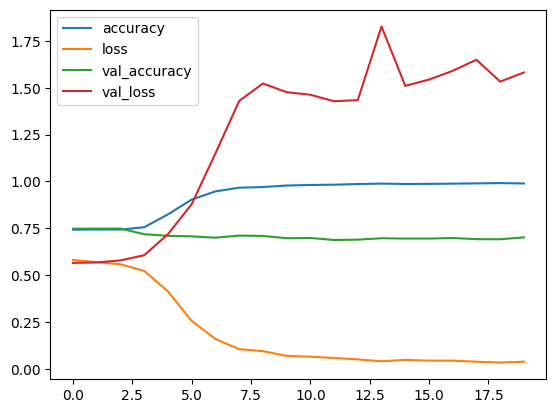

In [53]:
# plot the training and validation loss
plt.figure(figsize=(10, 6))
pd.DataFrame(history.history).plot()
plt.show()

### Baased on the above plot, the model is overfitting, so we need to add some regularization techniques to prevent overfitting.

### Convolutional Neural Network

In [33]:
# Define a simple convolutional neural network
cnn = Sequential()
cnn.add(Input(shape=input_shape))
cnn.add(Conv1D(64, 3, activation='relu'))
cnn.add(MaxPooling1D(2))
cnn.add(Conv1D(128, 3, activation='relu'))
cnn.add(MaxPooling1D(2))
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.2))
cnn.add(Dense(256, activation='relu'))
cnn.add(Dropout(0.2))
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(2, activation='sigmoid'))
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 998, 64)        │         2,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 499, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 497, 128)       │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 248, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 31744)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │     4,063,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,140,034 (15.79 MB)

 Trainable params: 4,140,034 (15.79 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
history = cnn.fit(X_train, y_train_oh, validation_data=(X_val, y_val_oh), epochs=20, batch_size=32)

Epoch 1/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.7353 - loss: 0.5919 - val_accuracy: 0.7478 - val_loss: 0.5650
Epoch 2/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.7401 - loss: 0.5712 - val_accuracy: 0.7478 - val_loss: 0.5675
Epoch 3/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - accuracy: 0.7377 - loss: 0.5607 - val_accuracy: 0.7481 - val_loss: 0.5784
Epoch 4/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.7569 - loss: 0.5168 - val_accuracy: 0.7181 - val_loss: 0.6062
Epoch 5/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.8308 - loss: 0.4074 - val_accuracy: 0.7095 - val_loss: 0.7180
Epoch 6/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.9034 - loss: 0.2514 - val_accuracy: 0.7067 - val_loss: 0.8785
Epoch 7/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.9490 - loss: 0.1611 - val_accuracy: 0.6996 - val_loss: 1.1488
Epoch 8/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9689 - loss: 0.0981 - 

<Figure size 1000x600 with 0 Axes>

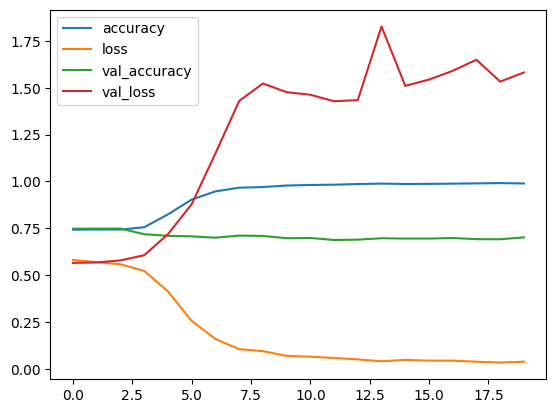

In [36]:
# plot the training and validation loss
plt.figure(figsize=(10, 6))
pd.DataFrame(history.history).plot()
plt.show()

### Baased on the above plot, the model is overfitting, so we need to add some regularization techniques to prevent overfitting.

### inspired by the LeNet-5 architecture

In [37]:
lenet = Sequential()
lenet.add(Conv1D(6, 3, padding ='same', activation='relu', input_shape=input_shape))
lenet.add(BatchNormalization())
lenet.add(MaxPooling1D(2, padding='same', strides=2))

lenet.add(Conv1D(16, 5,activation='relu'))
lenet.add(BatchNormalization())
lenet.add(MaxPooling1D(2, padding='same', strides=2))

lenet.add(GlobalAveragePooling1D())
lenet.add(Dense(64, activation='relu'))
#lenet.add(Dropout(0.2))
lenet.add(Dense(32, activation='relu'))
lenet.add(Dense(1, activation='sigmoid'))


/Users/gala/PycharmProjects/Saturdays_FP/disease-prediction/dis/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [39]:
lenet.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=optimizer, metrics=[tf.keras.metrics.BinaryAccuracy(
        name='accuracy', dtype=None, threshold=0.5),tf.keras.metrics.Recall(name='Recall'),tf.keras.metrics.Precision(name='Precision'), 
                    tf.keras.metrics.AUC(
        num_thresholds=200,
        curve="ROC",
        summation_method="interpolation",
        name="AUC",
        dtype=None,
        thresholds=None,
        multi_label=True,
        label_weights=None,
    )])

In [40]:
lenet.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 1000, 6)        │           222 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1000, 6)        │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 500, 6)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 496, 16)        │           496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 496, 16)        │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 248, 16)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 16)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,007 (15.65 KB)

 Trainable params: 3,963 (15.48 KB)

 Non-trainable params: 44 (176.00 B)

In [42]:
# As y_train, y_val, and y_test are one-hot encoded DataFrames we need to convert them to numpy arrays to be compatible with the model
y_train_s = np.argmax(y_train_oh.values, axis=1)
y_val_s= np.argmax(y_val_oh.values, axis=1)
y_test_s = np.argmax(y_test_oh.values, axis=1)

In [43]:
lenet.fit(X_train, y_train_s, validation_data=(X_val, y_val_s), epochs=20, batch_size=32)

Epoch 1/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - AUC: 0.5001 - Precision: 0.7436 - Recall: 0.9197 - accuracy: 0.7042 - loss: 0.5984 - val_AUC: 0.5116 - val_Precision: 0.7478 - val_Recall: 1.0000 - val_accuracy: 0.7478 - val_loss: 0.5659
Epoch 2/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - AUC: 0.5195 - Precision: 0.7487 - Recall: 1.0000 - accuracy: 0.7487 - loss: 0.5646 - val_AUC: 0.5146 - val_Precision: 0.7478 - val_Recall: 1.0000 - val_accuracy: 0.7478 - val_loss: 0.5654
Epoch 3/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - AUC: 0.5141 - Precision: 0.7450 - Recall: 1.0000 - accuracy: 0.7450 - loss: 0.5683 - val_AUC: 0.5165 - val_Precision: 0.7478 - val_Recall: 1.0000 - val_accuracy: 0.7478 - val_loss: 0.5669
Epoch 4/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - AUC: 0.5284 - Precision: 0.7444 - Recall: 0.9999 - accuracy: 0.7444 - loss: 0.5677 - val_AUC: 0.5158 - val_Precision: 0.7478 - val_Recall: 1.0000 - val_accuracy: 0.7478 - val_loss: 0.5659
Epoch 5/20
468/468 ━━━━━━━━━━━━

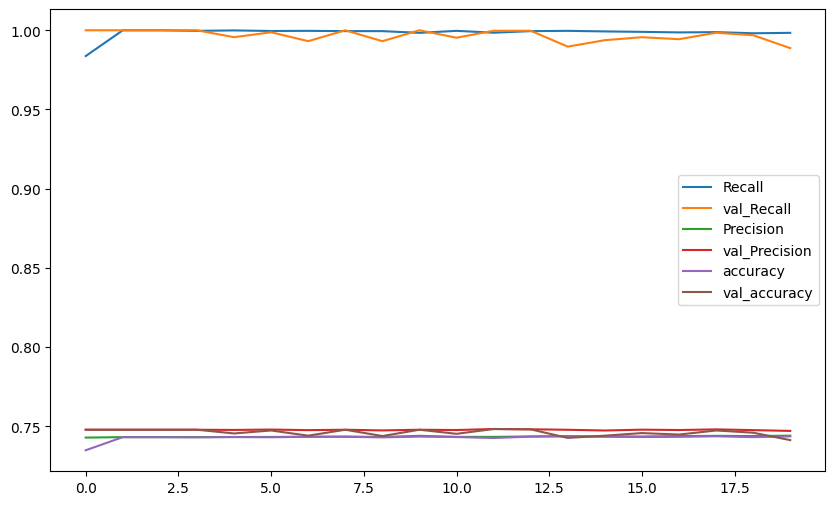

In [46]:
# plot the training Rcall and validation Recall, Precision, accuracy
plt.figure(figsize=(10, 6))
plt.plot(lenet.history.history['Recall'])
plt.plot(lenet.history.history['val_Recall'])
plt.plot(lenet.history.history['Precision'])
plt.plot(lenet.history.history['val_Precision'])
plt.plot(lenet.history.history['accuracy'])
plt.plot(lenet.history.history['val_accuracy'])
plt.legend(['Recall', 'val_Recall', 'Precision', 'val_Precision', 'accuracy', 'val_accuracy'])
plt.show()

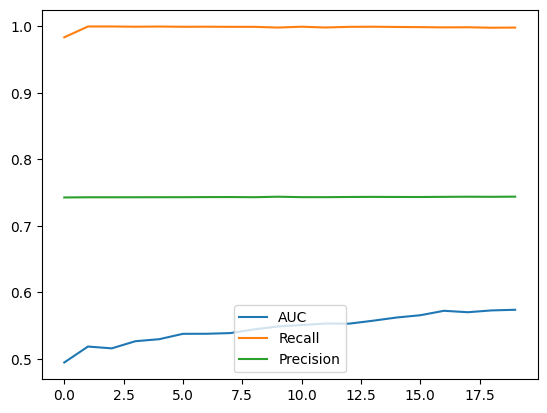

In [48]:
plt. plot(lenet.history.history['AUC'])
plt.plot(lenet.history.history['Recall'])
plt.plot(lenet.history.history['Precision'])
plt.legend(['AUC', 'Recall', 'Precision'])
plt.show()

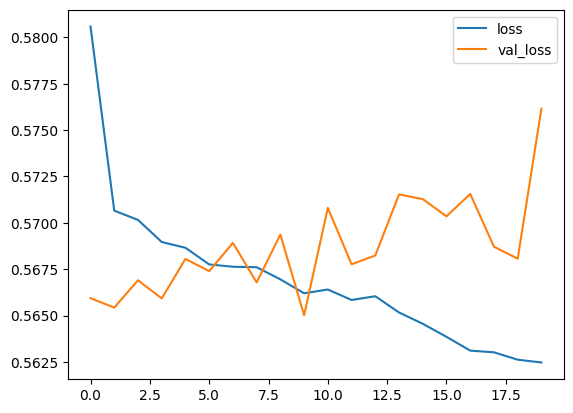

In [49]:
# loss and accuracy
plt.plot(lenet.history.history['loss'])
plt.plot(lenet.history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

In [50]:
# Evaluate the model on the test set
lenet.evaluate(X_test, y_test_s)

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.5469 - Precision: 0.7772 - Recall: 0.9943 - accuracy: 0.7745 - loss: 0.5439


[0.5749102234840393,
 0.743280827999115,
 0.9944030046463013,
 0.7458022236824036,
 0.528241753578186]

### Conclusion for the LeNet-5 architecture
- Tnhe most important metrics for this classification problem are Recall
- The model has an Recall of 0.99 on the test set, which is a good result and means that the model is able to correctly identify 99% of the positive cases of Myocardial Infarction.
- The Precision is still need to be improved, as it is only 0.77, which means that the model is able to correctly identify 74% of the positive cases of Myocardial Infarction.

In [55]:
# create and Save the model to the folder models
lenet.save('models/lenet_model.h5')